## Regularization Techniques - Hyperparameter Tuning

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

In [2]:
# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalise value 
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [6]:
# 2. Function to build MLP with specific regularization
def build_mlp(reg_type=None, reg_value=0.001, dropout_rate=0.0): 
    if reg_type == 'l1': 
        kernel_reg = regularizers.l1(reg_value)
    elif reg_type == 'l2':  
        kernel_reg = regularizers.l2(reg_value)
    else: 
        kernel_reg = None

    model = models.Sequential([
        layers.Input(shape=(784, )), 
        layers.Dense(128, activation='relu', kernel_regularizer=kernel_reg), 
        layers.Dropout(dropout_rate), 
        layers.Dense(64, activation='relu', kernel_regularizer=kernel_reg), 
        layers.Dropout(dropout_rate), 
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model    

In [7]:
# 3. configurations to test
configs = [
    {'reg_type':None, 'reg_value':0.0, 'dropout_rate': 0.0},
    {'reg_type':'l1', 'reg_value':0.001, 'dropout_rate': 0.0},
    {'reg_type':'l2', 'reg_value':0.001, 'dropout_rate': 0.0},
    {'reg_type':None, 'reg_value':0.0, 'dropout_rate': 0.3},
    {'reg_type':'l2', 'reg_value':0.001, 'dropout_rate': 0.3},
]

history_results = {}
test_results = {}

In [8]:
# 4. Train and evaluate each configuration
for cfg in configs: 
    print(f"\nTraining with {cfg}")
    model = build_mlp(cfg['reg_type'], cfg['reg_value'], cfg['dropout_rate'])
    history = model.fit(x_train, y_train, 
                        validation_split = 0.2, epochs = 10)
    history_results[str(cfg)]= history.history
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
    test_results[str(cfg)] = test_acc
    print(f"Test Accuracy: {test_acc:.4f}")
    


Training with {'reg_type': None, 'reg_value': 0.0, 'dropout_rate': 0.0}
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9213 - loss: 0.2684 - val_accuracy: 0.9625 - val_loss: 0.1260
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9659 - loss: 0.1135 - val_accuracy: 0.9682 - val_loss: 0.1026
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9773 - loss: 0.0754 - val_accuracy: 0.9681 - val_loss: 0.1045
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9821 - loss: 0.0569 - val_accuracy: 0.9709 - val_loss: 0.1024
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0437 - val_accuracy: 0.9732 - val_loss: 0.1027
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9880 - loss: 0.0360 - val_accuracy: 0.9767 - val_loss: 0.0922
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9899 - loss: 0.0300 - val_accuracy: 0.9758 - val_loss: 0.0936
Epoch 8/10
1500/1

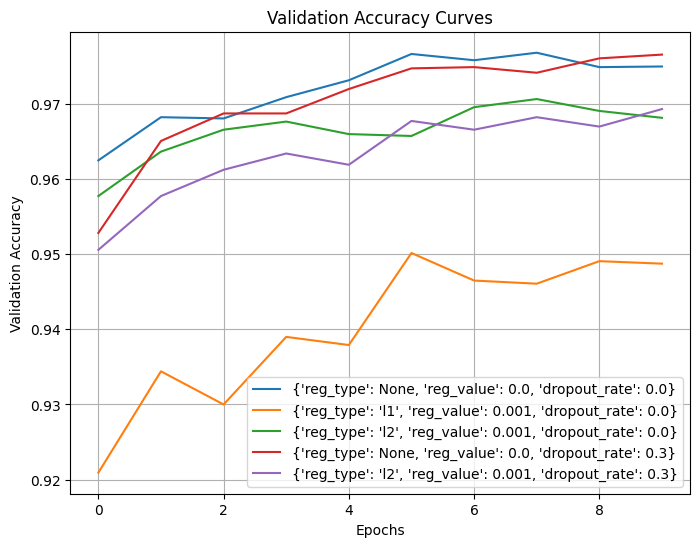

In [9]:
# 5. Plot validation accuracy curves
plt.figure(figsize=(8,6))
for cfg, hist in history_results.items(): 
    plt.plot(hist['val_accuracy'], label=cfg)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curves')
plt.legend()
plt.grid(True)
plt.show()

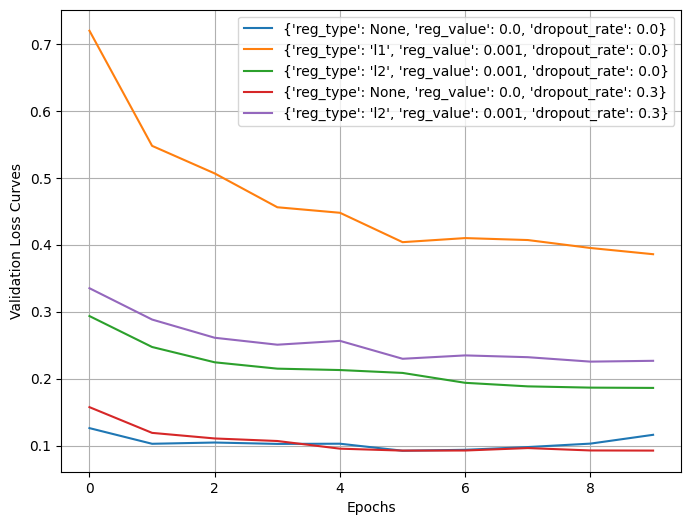

In [10]:
# 6. Plot validation loss curves
plt.figure(figsize=(8,6))
for cfg, hist in history_results.items(): 
    plt.plot(hist['val_loss'], label=cfg)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.ylabel('Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# 7. Final test accuracy comparison
print("\nFinal Test Accuracy Comparison: ")
for cfg, acc in test_results.items(): 
    print(f"{cfg}: {acc:.4f}")


Final Test Accuracy Comparison: 
{'reg_type': None, 'reg_value': 0.0, 'dropout_rate': 0.0}: 0.9758
{'reg_type': 'l1', 'reg_value': 0.001, 'dropout_rate': 0.0}: 0.9533
{'reg_type': 'l2', 'reg_value': 0.001, 'dropout_rate': 0.0}: 0.9695
{'reg_type': None, 'reg_value': 0.0, 'dropout_rate': 0.3}: 0.9760
{'reg_type': 'l2', 'reg_value': 0.001, 'dropout_rate': 0.3}: 0.9687
